In [24]:
import numpy as np 
import theano 
import theano.tensor as T
import matplotlib.pyplot as plt

x = T.vector('x')

#### FInding squares of a sequence

In [2]:
def square(x):
    return x*x

In [4]:
outputs, updates = theano.scan(
    fn=square, 
    sequences=x, 
    n_steps=x.shape[0]
)

In [5]:
square_op = theano.function(inputs=[x], 
                            outputs=[outputs])

In [6]:
o_val = square_op(np.array([1, 2, 3, 4, 5, 6]))

In [7]:
print o_val

[array([  1.,   4.,   9.,  16.,  25.,  36.])]


#### Computing fibonacci 

In [15]:
N = T.iscalar('N') 

In [16]:
def fibonacci(n, fn_1, fn_2):
    return fn_1 + fn_2, fn_1

In [17]:
outputs, updates = theano.scan(
                        fn=fibonacci, 
                        sequences=T.arange(N), 
                        n_steps = N, 
                        outputs_info=[1., 1.]
                        )

In [19]:
fibonacci = theano.function(inputs=[N], 
                            outputs=outputs)

In [21]:
print fibonacci(8)

[array([  2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.], dtype=float32), array([  1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.], dtype=float32)]


#### Low pass filter

In [22]:
X = 2 * np.random.rand(300) + np.sin(np.linspace(0, 3*np.pi, 300))

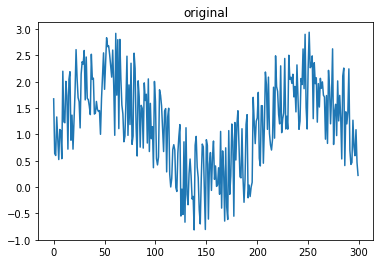

In [25]:
plt.plot(X)
plt.title('original')
plt.show()

In [26]:
decay = T.scalar("decay")
sequence = T.vector("sequence")

In [27]:
def recurrence(x, last, decay):
    return (1-decay) * x + decay * last

In [28]:
outputs, _ = theano.scan(
                fn=recurrence, 
                sequences=sequence, 
                n_steps=sequence.shape[0], 
                outputs_info=[np.float64(0)], 
                non_sequences=[decay], 
)

In [29]:
lpf = theano.function(
                inputs=[sequence, decay], 
                outputs=outputs, 
)

In [30]:
Y = lpf(X, 0.99)

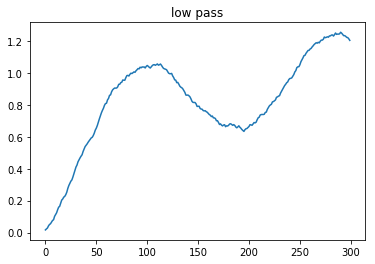

In [31]:
plt.plot(Y)
plt.title("low pass")
plt.show()